In [ ]:
######## import all necessity functions ##########
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, silhouette_score

In [ ]:
####### Import the dataset ########
df = pd.read_csv('/content/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
####### Check the Target value ########
df.loc[:, 'Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
####### Label Encoding ########
df.loc[:, 'Drug'] = df.loc[:, 'Drug'].map({'DrugY': 0, 'drugX': 1, 'drugA': 2, 'drugC': 3, 'drugB': 4})
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,0
1,47,M,LOW,HIGH,13.093,3
2,47,M,LOW,HIGH,10.114,3
3,28,F,NORMAL,HIGH,7.798,1
4,61,F,LOW,HIGH,18.043,0


In [ ]:
###### One Hot Encoding ######
df = pd.get_dummies(df, columns = ['Sex', 'BP', 'Cholesterol'], drop_first = True)
###### print the dataframe #######
df.head()

,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0,0
1,47,13.093,3,1,1,0,0
2,47,10.114,3,1,1,0,0
3,28,7.798,1,0,0,1,0
4,61,18.043,0,0,1,0,0


In [ ]:
###### split the dataset into X and y ######
y = df.loc[:, 'Drug']
###### drop the Drug column #######
df.drop(columns = ['Drug'], axis = 1, inplace = True)
###### X #######
X = df.iloc[:].values
y = y

In [ ]:
####### Scaling the dataset ########
scaler_ = StandardScaler()
X = scaler_.fit_transform(X)

In [ ]:
####### Train and test split #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 42)

In [ ]:
##### Now using Stacking and Blending for prediction ######

##### Stacking and Blending #####

estimators_ = [
    ('Decision_tree', DecisionTreeClassifier(random_state = 42, criterion = 'entropy')),
    ('XgBoost', XGBClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors = 5)),
    ('Random_forest', RandomForestClassifier())
]

stacking_blending_ = StackingClassifier(estimators = estimators_, final_estimator = XGBClassifier(), cv = 10)
stacking_blending_.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('Decision_tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=42)),
                               ('XgBoost', XGBClassifier()),
                               ('KNN', KNeighborsClassifier()),
                               ('Random_forest', RandomForestClassifier())],
                   final_estimator=XGBClassifier())

In [ ]:
predicted_ = stacking_blending_.predict(X_test)
print("accuracy is   = ", accuracy_score(predicted_, y_test))
print("recall is     = ", recall_score(predicted_, y_test, average = 'micro'))
print("precision is  = ", precision_score(predicted_, y_test, average = 'micro'))
print("f1 score is   = ", f1_score(predicted_, y_test, average = 'micro'))

accuracy is   =  1.0
recall is     =  1.0
precision is  =  1.0
f1 score is   =  1.0


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Do the same thing using Artificial Neural Network


In [ ]:
######## Import all Functions ########
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU, LeakyReLU, ELU, PReLU
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.activations import sigmoid, tanh, softmax
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, Huber, MSE
from tensorflow.keras.optimizers import SGD, Adadelta, Adagrad, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.regularizers import L2, L1, l1_l2

In [ ]:
####### Create a model #########
model = Sequential()
####### Create a input layer #######
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = HeNormal(), kernel_regularizer = L1(), input_dim = X.shape[1]))

####### Create a hidden layer ########
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = HeNormal(), kernel_regularizer = L1()))

####### Create the output layer ########
model.add(Dense(units = 5, activation = 'softmax'))

####### compile the model ########
model.compile(optimizer = Adam(), loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

####### fit the model ########
history_ = model.fit(x = X_train, y = y_train, batch_size = 15, validation_data = (X_test, y_test), epochs = 100, verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 9.6890 - accuracy: 0.2389 - val_loss: 8.9815 - val_accuracy: 0.6000
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 8.7372 - accuracy: 0.6389 - val_loss: 8.5260 - val_accuracy: 0.6500
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 8.3142 - accuracy: 0.7278 - val_loss: 8.1549 - val_accuracy: 0.8500
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 7.9810 - accuracy: 0.8333 - val_loss: 7.7930 - val_accuracy: 0.9500
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 7.6788 - accuracy: 0.8944 - val_loss: 7.5156 - val_accuracy: 0.9500
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 7.4138 - accuracy: 0.9500 - val_loss: 7.2526 - val_accuracy: 0.9500
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 7.1701 - accuracy: 0.9500 - val_loss: 7.0114 - val_accuracy: 1.0000
Epoch 8/100


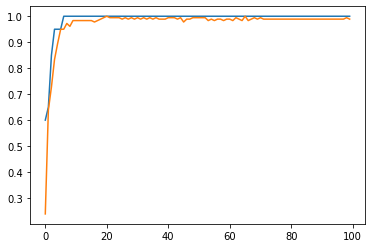

In [ ]:
plt.plot(history_.history['val_accuracy'])
plt.plot(history_.history['accuracy'])

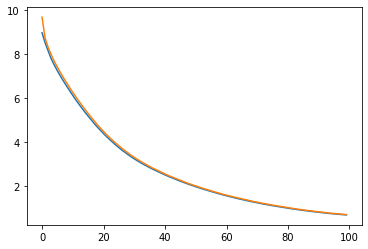

In [ ]:
plt.plot(history_.history['val_loss'])
plt.plot(history_.history['loss'])

In [ ]:
from tensorflow.keras.metrics import Recall, Precision, Accuracy

In [ ]:
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis = 1)
###### print accuracy, reacll, precision and f1_score ########
print("accuracy is   = ", accuracy_score(y_pred_bool, y_test))
print("recall is     = ", recall_score(y_pred_bool, y_test, average = 'micro'))
print("precision is  = ", precision_score(y_pred_bool, y_test, average = 'micro'))
print("f1 score is   = ", f1_score(y_pred_bool, y_test, average = 'micro'))

accuracy is   =  1.0
recall is     =  1.0
precision is  =  1.0
f1 score is   =  1.0


Using KFOLD cross Validation 

In [ ]:
kfold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_ = 0
accuracy_, recall_, precision_, f1_score_ = [], [], [], []
for train_index, test_index in kfold_.split(X, y):
  print("Cross Validation # ", count_, '\n')
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 20, verbose = 1)
  y_pred = model.predict(X_test)
  y_pred_bool = np.argmax(y_pred, axis = 1)
  accuracy_.append(accuracy_score(y_pred_bool, y_test))
  recall_.append(recall_score(y_pred_bool, y_test, average = 'micro'))
  precision_.append(precision_score(y_pred_bool, y_test, average = 'micro'))
  f1_score_.append(f1_score(y_pred_bool, y_test, average = 'micro'))
  count_ = count_ + 1


Cross Validation #  0 

Epoch 1/100
9/9 [==============================] - 1s 38ms/step - loss: 0.7099 - accuracy: 0.9944 - val_loss: 0.6962 - val_accuracy: 1.0000
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7001 - accuracy: 0.9944 - val_loss: 0.6876 - val_accuracy: 1.0000
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6926 - accuracy: 0.9889 - val_loss: 0.6804 - val_accuracy: 1.0000
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 0.6849 - accuracy: 0.9889 - val_loss: 0.6729 - val_accuracy: 1.0000
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.6777 - accuracy: 0.9889 - val_loss: 0.6666 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6707 - accuracy: 0.9889 - val_loss: 0.6594 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6648 - accuracy: 0.9889 - val_loss: 0.6539 - val_accuracy: 1.0000
E

In [ ]:
print("accuracy score is  = ", np.array(accuracy_).mean())
print("reacll score is    = ", np.array(recall_).mean())
print("precision score is = ", np.array(precision_).mean())
print("f1_score score is  = ", np.array(f1_score_).mean())

accuracy score is  =  0.985
reacll score is    =  0.985
precision score is =  0.985
f1_score score is  =  0.9850000000000001


Heart Stroke Prediction Using ANN AND Machine Learning



In [ ]:
###### import the dataset #######
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
###### Delete the id column ######
df.drop(['id'], axis = 1, inplace = True)
print("id column is dropped.")

id column is dropped.


In [ ]:
print("The # of columns of this dataset is = ", df.shape[0],'\nThe # of row of this dataset = ', df.shape[1])

The # of columns of this dataset is =  5110 
The # of row of this dataset =  11


In [ ]:
####### Null Value check in this dataset ########
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
####### Capturing NaN with a new_feature #########
df['capture_nan_bmi'] = np.where(df.loc[:, 'bmi'].isnull(), 1, 0)
####### Mean value will be stored in the NaN ########
df.fillna(df.loc[:, 'bmi'].mean(), inplace = True)
####### print the dataset #########
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,capture_nan_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0


In [ ]:
for column_ in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
  print(column_, 'has unique value = ', df.loc[:, column_].nunique(),'\n')

gender has unique value =  3 

ever_married has unique value =  2 

work_type has unique value =  5 

Residence_type has unique value =  2 

smoking_status has unique value =  4 



In [ ]:
###### One Hot Encoding in gender, ever_married, Residence_type, smoking_status ########
df = pd.get_dummies(df, columns = ['gender', 'ever_married', 'Residence_type', 'smoking_status'], drop_first = True)
###### print the dataframe ########
df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,capture_nan_bmi,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,Private,228.69,36.600000,1,0,1,0,1,1,1,0,0
1,61.0,0,0,Self-employed,202.21,28.893237,1,1,0,0,1,0,0,1,0
2,80.0,0,1,Private,105.92,32.500000,1,0,1,0,1,0,0,1,0
3,49.0,0,0,Private,171.23,34.400000,1,0,0,0,1,1,0,0,1
4,79.0,1,0,Self-employed,174.12,24.000000,1,0,0,0,1,0,0,1,0


In [ ]:
###### Target Guided OrdinaL Encoding #######
df.loc[:, 'work_type'] = df.loc[:, 'work_type'].map({key_: value_ for value_, key_ in enumerate(df.groupby(['work_type'])['stroke'].mean().sort_values(ascending = True).index)})
###### print the dataframe #######
df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,stroke,capture_nan_bmi,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,3,228.69,36.600000,1,0,1,0,1,1,1,0,0
1,61.0,0,0,4,202.21,28.893237,1,1,0,0,1,0,0,1,0
2,80.0,0,1,3,105.92,32.500000,1,0,1,0,1,0,0,1,0
3,49.0,0,0,3,171.23,34.400000,1,0,0,0,1,1,0,0,1
4,79.0,1,0,4,174.12,24.000000,1,0,0,0,1,0,0,1,0


In [ ]:
####### Split the dataset into X and y ########
y = df.loc[:, 'stroke']
###### drop the stroke column #######
df.drop(['stroke'], axis = 1, inplace = True)
###### Scaling the dataset using Scaler #######
StandardScaler_ = StandardScaler()
X = StandardScaler_.fit_transform(df.values)

In [ ]:
###### Imbalanced Dataset ######
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
###### make it balanced #######
ADASYN_ = ADASYN()
X, y = ADASYN_.fit_resample(X, y)
print(X.shape, y.shape)

(9700, 14) (9700,)


In [ ]:
####### Train and test split #######
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 30, random_state = 42)

In [ ]:
####### Create a model #######
model = Sequential()
####### Create a input layer #######
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = HeNormal(), input_dim = X.shape[1]))
####### Dropout layer ########
model.add(Dropout(0.5))
####### Create first hidden layer #######
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = HeNormal()))
####### Create second hidden layer #######
model.add(Dense(units = 32, activation = 'relu', kernel_initializer = HeNormal()))

####### Create output layer ########
model.add(Dense(units = 1, activation = 'sigmoid'))

####### Compile the model ########
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

###### fit the model and run ########
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
303/303 [==============================] - 2s 5ms/step - loss: 0.5336 - accuracy: 0.7307 - val_loss: 0.6185 - val_accuracy: 0.7000
Epoch 2/50
303/303 [==============================] - 1s 4ms/step - loss: 0.4702 - accuracy: 0.7764 - val_loss: 0.5360 - val_accuracy: 0.7333
Epoch 3/50
303/303 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.7887 - val_loss: 0.4911 - val_accuracy: 0.7333
Epoch 4/50
303/303 [==============================] - 1s 4ms/step - loss: 0.4341 - accuracy: 0.7966 - val_loss: 0.4104 - val_accuracy: 0.7667
Epoch 5/50
303/303 [==============================] - 1s 4ms/step - loss: 0.4162 - accuracy: 0.8096 - val_loss: 0.3631 - val_accuracy: 0.8667
Epoch 6/50
303/303 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8190 - val_loss: 0.3130 - val_accuracy: 0.8333
Epoch 7/50
303/303 [==============================] - 1s 4ms/step - loss: 0.3900 - accuracy: 0.8222 - val_loss: 0.3138 - val_accuracy: 0.8667
Epoch 

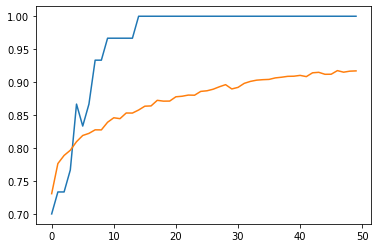

In [ ]:
plt.plot(history_.history['val_accuracy'])
plt.plot(history_.history['accuracy'])

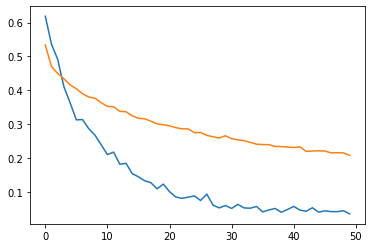

In [ ]:
plt.plot(history_.history['val_loss'])
plt.plot(history_.history['loss'])

In [ ]:
predicted_ = np.where(model.predict(X_test)>0.5, 1, 0)
print("Accuracy is = ", accuracy_score(predicted_, y_test))
print("Recall is = ",recall_score(predicted_, y_test))
print("Precision is = ",precision_score(predicted_, y_test))
print("f1_score is = ",f1_score(predicted_, y_test))

Accuracy is =  1.0
Recall is =  1.0
Precision is =  1.0
f1_score is =  1.0


Using KFold Cross Validation 

In [ ]:
kfold_ = KFold(n_splits = 10, shuffle = True, random_state = 42)
count_, accuracy_, recall_, precision_, f1_score_ = 0, [], [], [], []

for train_index, test_index in kfold_.split(X, y):
  print("Cross Validation # ", count_, '\n')
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32)
  predicted_ = np.where(model.predict(X_test)>0.5, 1, 0)
  accuracy_.append(accuracy_score(predicted_, y_test))
  recall_.append(recall_score(predicted_, y_test))
  precision_.append(precision_score(predicted_, y_test))
  f1_score_.append(f1_score(predicted_, y_test))
  count_ = count_ + 1

Cross Validation #  0 

Epoch 1/100
273/273 [==============================] - 1s 4ms/step - loss: 0.2129 - accuracy: 0.9144 - val_loss: 0.1420 - val_accuracy: 0.9485
Epoch 2/100
273/273 [==============================] - 1s 4ms/step - loss: 0.2125 - accuracy: 0.9167 - val_loss: 0.1372 - val_accuracy: 0.9577
Epoch 3/100
273/273 [==============================] - 1s 4ms/step - loss: 0.2146 - accuracy: 0.9158 - val_loss: 0.1377 - val_accuracy: 0.9536
Epoch 4/100
273/273 [==============================] - 1s 4ms/step - loss: 0.2016 - accuracy: 0.9210 - val_loss: 0.1450 - val_accuracy: 0.9505
Epoch 5/100
273/273 [==============================] - 1s 4ms/step - loss: 0.2087 - accuracy: 0.9199 - val_loss: 0.1477 - val_accuracy: 0.9546
Epoch 6/100
273/273 [==============================] - 1s 4ms/step - loss: 0.1986 - accuracy: 0.9241 - val_loss: 0.1409 - val_accuracy: 0.9474
Epoch 7/100
273/273 [==============================] - 1s 4ms/step - loss: 0.2033 - accuracy: 0.9180 - val_loss: 0.136

In [ ]:
####### print the accuracy, recall, precision and f1_score ########
print("accuracy is  = ", np.array(accuracy_).mean())
print("recall is    = ", np.array(recall_).mean())
print("precision is = ", np.array(precision_).mean())
print("f1_score is  = ", np.array(f1_score_).mean())

accuracy is  =  0.9754639175257731
recall is    =  0.9588633617320852
precision is =  0.9935414348862863
f1_score is  =  0.97586239744923


Hyperparameter Tuning using Keras Tuner in Artificial Neural Network

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 6.7 MB/s 


In [ ]:
###### Import Keras Tuner #######
import keras_tuner as kt

In [ ]:
def build_model(hp):

  model = Sequential()

  counter = 0

  for i in range(hp.Int('num_layers',min_value=1,max_value=3)):

    if counter == 0:

      model.add(Dense(hp.Choice('units' + str(i), values = [256, 128]),activation= 'relu',input_dim=X.shape[1]))
      model.add(Dropout(hp.Choice('dropout' + str(i), values=[0.5,0.6])))
    else:
      model.add(Dense(hp.Choice('units' + str(i), values = [32, 16, 8]),activation='relu'))

    counter+=1

  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
  return model

In [ ]:
tuner_ = kt.RandomSearch(
    hypermodel = build_model,
    objective = 'val_accuracy',
    max_trials = 10, 
    directory = 'mydir',
    project_name = "keras_tuner_final_"
)

In [ ]:
tuner_.search(X_train, y_train, validation_data = (X_test, y_test), epochs = 25, verbose = 1, batch_size = 32)

Trial 10 Complete [00h 00m 26s]
val_accuracy: 0.8865979313850403

Best val_accuracy So Far: 0.9164948463439941
Total elapsed time: 00h 05m 28s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner_.get_best_hyperparameters()[0].values

{'dropout0': 0.5, 'num_layers': 3, 'units0': 256, 'units1': 32, 'units2': 32}

In [ ]:
###### Create a model ########
model = Sequential()
###### Create input layer #######
model.add(Dense(units = 256, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
###### Dropout layer #######
model.add(Dropout(0.5))
###### Create first hidden layer
model.add(Dense(units = 8, kernel_initializer = HeNormal(), activation = 'relu'))
###### Create second hidden layer
model.add(Dense(units = 32, kernel_initializer = HeNormal(), activation = 'relu'))
###### output function #######
model.add(Dense(units = 1, activation = 'sigmoid'))

###### Compile the model #######
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#####fit the model #######
history_ = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 150, initial_epoch = 26, batch_size = 32, verbose = 1)

Epoch 27/150
273/273 [==============================] - 2s 4ms/step - loss: 0.5379 - accuracy: 0.7205 - val_loss: 0.4469 - val_accuracy: 0.7990
Epoch 28/150
273/273 [==============================] - 1s 4ms/step - loss: 0.4633 - accuracy: 0.7770 - val_loss: 0.4295 - val_accuracy: 0.8134
Epoch 29/150
273/273 [==============================] - 1s 4ms/step - loss: 0.4548 - accuracy: 0.7869 - val_loss: 0.4126 - val_accuracy: 0.8227
Epoch 30/150
273/273 [==============================] - 1s 4ms/step - loss: 0.4367 - accuracy: 0.7938 - val_loss: 0.3955 - val_accuracy: 0.8237
Epoch 31/150
273/273 [==============================] - 1s 4ms/step - loss: 0.4227 - accuracy: 0.8045 - val_loss: 0.3932 - val_accuracy: 0.8278
Epoch 32/150
273/273 [==============================] - 1s 4ms/step - loss: 0.4121 - accuracy: 0.8129 - val_loss: 0.3820 - val_accuracy: 0.8320
Epoch 33/150
273/273 [==============================] - 1s 4ms/step - loss: 0.4023 - accuracy: 0.8139 - val_loss: 0.3783 - val_accuracy:

In [ ]:
accuracy_score(np.where(model.predict(X_test)>0.5, 1, 0), y_test)

0.9412371134020618

In [ ]:
#############################################################

In [ ]:
df = pd.read_csv('/content/Swarm_Behaviour.csv')
df.head()

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.0,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.0,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.3,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.0,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.0,12,0,0.0


In [ ]:
df.loc[:, 'Swarm_Behaviour'] = df.loc[:, 'Swarm_Behaviour'].astype(int)

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
scaler_ = StandardScaler()
X = scaler_.fit_transform(X)

In [ ]:
ADASYN_ = ADASYN()
X, y = ADASYN_.fit_resample(X, y)
print(X.shape, y.shape)

(30706, 2400) (30706,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
pred_ = xgboost.predict(X_test)
accuracy_score(pred_, y_test)

0.9264003473729917

In [ ]:
print("accuracy is   = ", accuracy_score(pred_, y_test))
print("recall is     = ", recall_score(pred_, y_test))
print("precision is  = ", precision_score(pred_, y_test))
print("f1 score is   = ", f1_score(pred_, y_test))

accuracy is   =  0.9264003473729917
recall is     =  0.8721193804306763
precision is  =  0.9997834560415765
f1 score is   =  0.9315980629539952


In [ ]:
###### Create a model #######
model = Sequential()
###### Create an input layer ######
model.add(Dense(units = 128, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
###### Dropout ratio #######
model.add(Dropout(0.5))
###### Batch Normalization ######
model.add(BatchNormalization())
###### Create first hidden layer #######
model.add(Dense(units = 64, kernel_initializer = HeNormal(), activation = 'relu'))
###### Dropout ratio #######
model.add(Dropout(0.5))
###### Create second hidden layer #######
model.add(Dense(units = 16, kernel_initializer = HeNormal(), activation = 'relu'))

###### Compile the model #######
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['Accuracy'])
###### Create output layer ######
model.add(Dense(units = 1, activation = 'sigmoid'))

###### fit the model #######
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
336/336 [==============================] - 3s 6ms/step - loss: 0.2851 - Accuracy: 0.8872 - val_loss: 0.1968 - val_Accuracy: 0.9261
Epoch 2/100
336/336 [==============================] - 2s 6ms/step - loss: 0.2105 - Accuracy: 0.9230 - val_loss: 0.1956 - val_Accuracy: 0.9261
Epoch 3/100
336/336 [==============================] - 2s 5ms/step - loss: 0.2015 - Accuracy: 0.9257 - val_loss: 0.1925 - val_Accuracy: 0.9262
Epoch 4/100
336/336 [==============================] - 2s 5ms/step - loss: 0.1975 - Accuracy: 0.9257 - val_loss: 0.1922 - val_Accuracy: 0.9262
Epoch 5/100
336/336 [==============================] - 2s 5ms/step - loss: 0.1938 - Accuracy: 0.9259 - val_loss: 0.1935 - val_Accuracy: 0.9262
Epoch 6/100
336/336 [==============================] - 2s 5ms/step - loss: 0.1928 - Accuracy: 0.9265 - val_loss: 0.1903 - val_Accuracy: 0.9262
Epoch 7/100
336/336 [==============================] - 2s 5ms/step - loss: 0.1925 - Accuracy: 0.9267 - val_loss: 0.1926 - val_Accuracy: 0.9262

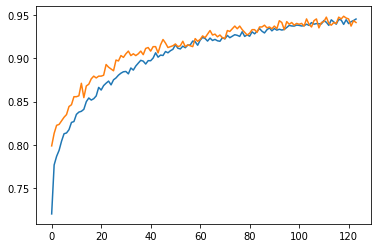

In [ ]:
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])

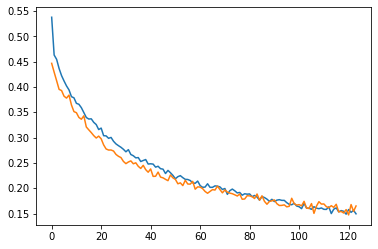

In [ ]:
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])

In [ ]:
predicted_ = np.where(model.predict(X_test)>0.5, 1, 0)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("f1_score is = ", f1_score(predicted_, y_test))

accuracy is =  0.9264003473729917
recall is =  0.8743823641201064
precision is =  0.9963187527067995
f1_score is =  0.9313765182186234


In [ ]:
###### Performs PCA ######
PCA_ = PCA(n_components=500)
X = PCA_.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [ ]:
###### Create a model #######
model = Sequential()
###### Create an input layer ######
model.add(Dense(units = 128, kernel_initializer = HeNormal(), activation = 'relu', input_dim = X.shape[1]))
###### Dropout ratio #######
model.add(Dropout(0.5))
###### Batch Normalization ######
model.add(BatchNormalization())
###### Create first hidden layer #######
model.add(Dense(units = 64, kernel_initializer = HeNormal(), activation = 'relu'))
###### Dropout ratio #######
model.add(Dropout(0.6))
###### Batch Normalization ######
model.add(BatchNormalization())
###### Create second hidden layer #######
model.add(Dense(units = 16, kernel_initializer = HeNormal(), activation = 'relu'))

###### Compile the model #######
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['Accuracy'])
###### Create output layer ######
model.add(Dense(units = 1, activation = 'sigmoid'))

###### fit the model #######
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
336/336 [==============================] - 3s 7ms/step - loss: 0.4009 - Accuracy: 0.8255 - val_loss: 0.2009 - val_Accuracy: 0.9248
Epoch 2/100
336/336 [==============================] - 2s 6ms/step - loss: 0.2303 - Accuracy: 0.9175 - val_loss: 0.1929 - val_Accuracy: 0.9261
Epoch 3/100
336/336 [==============================] - 2s 6ms/step - loss: 0.2076 - Accuracy: 0.9234 - val_loss: 0.1908 - val_Accuracy: 0.9261
Epoch 4/100
336/336 [==============================] - 2s 6ms/step - loss: 0.2022 - Accuracy: 0.9248 - val_loss: 0.1902 - val_Accuracy: 0.9262
Epoch 5/100
336/336 [==============================] - 2s 6ms/step - loss: 0.1969 - Accuracy: 0.9257 - val_loss: 0.1907 - val_Accuracy: 0.9262
Epoch 6/100
336/336 [==============================] - 2s 6ms/step - loss: 0.1929 - Accuracy: 0.9263 - val_loss: 0.1895 - val_Accuracy: 0.9261
Epoch 7/100
336/336 [==============================] - 2s 6ms/step - loss: 0.1942 - Accuracy: 0.9257 - val_loss: 0.1894 - val_Accuracy: 0.9261

In [ ]:
predicted_ = np.where(model.predict(X_test)>0.5, 1, 0)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("f1_score is = ", f1_score(predicted_, y_test))

accuracy is =  0.9264003473729917
recall is =  0.8749524172059383
precision is =  0.9954525768731053
f1_score is =  0.931320907617504


In [ ]:
X

In [ ]:
kfold_ = KFold(n_splits = 5, shuffle = True, random_state = 42)
count_, accuracy_, recall_, precision_, f1_score_ = 0, [], [], [], []

for train_index, test_index in kfold_.split(X, y):
  print("Cross Validation # ", count_, '\n')
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64)
  predicted_ = np.where(model.predict(X_test)>0.5, 1, 0)
  accuracy_.append(accuracy_score(predicted_, y_test))
  recall_.append(recall_score(predicted_, y_test))
  precision_.append(precision_score(predicted_, y_test))
  f1_score_.append(f1_score(predicted_, y_test))
  count_ = count_ + 1

Cross Validation #  0 

Epoch 1/100
384/384 [==============================] - 2s 6ms/step - loss: 0.1772 - Accuracy: 0.9302 - val_loss: 0.2226 - val_Accuracy: 0.9227
Epoch 2/100
384/384 [==============================] - 2s 6ms/step - loss: 0.1723 - Accuracy: 0.9309 - val_loss: 0.2267 - val_Accuracy: 0.9227
Epoch 3/100
384/384 [==============================] - 2s 6ms/step - loss: 0.1741 - Accuracy: 0.9319 - val_loss: 0.2190 - val_Accuracy: 0.9225
Epoch 4/100
384/384 [==============================] - 2s 6ms/step - loss: 0.1738 - Accuracy: 0.9311 - val_loss: 0.2212 - val_Accuracy: 0.9225
Epoch 5/100
384/384 [==============================] - 2s 6ms/step - loss: 0.1718 - Accuracy: 0.9310 - val_loss: 0.2247 - val_Accuracy: 0.9228
Epoch 6/100
384/384 [==============================] - 2s 6ms/step - loss: 0.1722 - Accuracy: 0.9313 - val_loss: 0.2250 - val_Accuracy: 0.9225
Epoch 7/100
384/384 [==============================] - 2s 6ms/step - loss: 0.1735 - Accuracy: 0.9311 - val_loss: 0.224

In [ ]:
####### print the accuracy, recall, precision and f1_score ########
print("accuracy is  = ", np.array(accuracy_).mean())
print("recall is    = ", np.array(recall_).mean())
print("precision is = ", np.array(precision_).mean())
print("f1_score is  = ", np.array(f1_score_).mean())

accuracy is  =  0.9332055588705049
recall is    =  0.8855262779658648
precision is =  0.9951097974710889
f1_score is  =  0.9371031945994585


Use this dataset and do the voting classifier 

In [ ]:
estimators_ = [
    ('Xgboost_', XGBClassifier()),
    ('GradientBoosting_', GradientBoostingClassifier()),
    ('DecisionTree_', DecisionTreeClassifier())
]
VotingClassifier_ = VotingClassifier(estimators = estimators_, n_jobs = -1, verbose = 1, voting = 'soft')
VotingClassifier_.fit(X_train, y_train)

VotingClassifier(estimators=[('Xgboost_', XGBClassifier()),
                             ('GradientBoosting_',
                              GradientBoostingClassifier()),
                             ('DecisionTree_', DecisionTreeClassifier())],
                 n_jobs=-1, verbose=1, voting='soft')

In [ ]:
predicted_ = VotingClassifier_.predict(X_test)
print("accuracy is = ", accuracy_score(predicted_, y_test))
print("recall is = ", recall_score(predicted_, y_test))
print("precision is = ", precision_score(predicted_, y_test))
print("f1_score is = ", f1_score(predicted_, y_test))

accuracy is =  0.9206969548933398
recall is =  0.8777330264672036
precision is =  0.9800835207195632
f1_score is =  0.9260889361056306


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.2 kB/s 
     |████████████████████████████████| 438 kB 64.6 MB/s 
     |████████████████████████████████| 1.6 MB 52.6 MB/s 
     |████████████████████████████████| 5.8 MB 62.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.